In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
#from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [2]:
origin_data = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
data=origin_data.dropna(axis=0,subset=['price'])

In [4]:
data=data.drop(data.columns[0],axis=1)

In [5]:
data.reset_index(drop=True, inplace=True)

In [7]:
ncol=[]
ncol.append(data.columns)
ncol.append([data[col].nunique() for col in data.columns])
ncol=pd.DataFrame(np.asarray(ncol))
ncol

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,42,111567,35776,21,390,422,1204,17,19,15,110638,697,15855


In [8]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df

,column_name,missing_count
0,country,59
1,description,0
2,designation,34779
3,points,0
4,price,0
5,province,59
6,region_1,19575
7,region_2,70683
8,taster_name,24496
9,taster_twitter_handle,29416


In [9]:
data['title']

0             Quinta dos Avidagos 2011 Avidagos Red (Douro)
1             Rainstorm 2013 Pinot Gris (Willamette Valley)
2         St. Julian 2013 Reserve Late Harvest Riesling ...
3         Sweet Cheeks 2012 Vintner's Reserve Wild Child...
4         Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...
5          Terre di Giurfo 2013 Belsito Frappato (Vittoria)
6                     Trimbach 2012 Gewurztraminer (Alsace)
7         Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...
8         Jean-Baptiste Adam 2012 Les Natures Pinot Gris...
9         Kirkland Signature 2011 Mountain Cuvée Caberne...
10                  Leon Beyer 2012 Gewurztraminer (Alsace)
11        Louis M. Martini 2012 Cabernet Sauvignon (Alex...
12                 Mirassou 2012 Chardonnay (Central Coast)
13              Richard Böcking 2013 Devon Riesling (Mosel)
14               Felix Lavaque 2010 Felix Malbec (Cafayate)
15        Gaucho Andino 2011 Winemaker Selection Malbec ...
16        Pradorey 2010 Vendimia Selecci

In [6]:

def extract_title(title):
    n = len(title)
    
    ex_title1 = None
    ex_title2 = None
    ex_title3 = None
    ex_title4 = None
    if title == None :
        return ex_title1,ex_title2,ex_title3,ex_title4
    ye=99999
    i = n-3
    while i in range(n):
        if (title[i]=='2')or(title[i]=='1')and(i+4<=n) :
            st = title[i:i+4]
            if st.isdigit():
                if (int(st)>1948)and(int(st)<2018):
                    ye = i
                    i = 99999
        i -= 1
    if ye != 99999:
        ex_title1 = title[:ye]
        ex_title2 = title[ye:ye+4]
        title = title[ye+4:]
    n = len(title)
    i = n-1
    brac=99999
    if title[i]==')':  
        while i in range(n):
            if title[i]=='(':
                brac = i
                i = 99999
            i -= 1
    else:
        ex_title3=title[0:]
    if brac != 99999:
        ex_title3 = title[0:brac]
        ex_title4=title[brac+1:n-1]
    
    ex_title1 = ex_title1.strip() if ex_title1 != None else None
    ex_title2 = ex_title2.strip() if ex_title2 != None else None
    ex_title3 = ex_title3.strip() if ex_title3 != None else None
    ex_title4 = ex_title4.strip() if ex_title4 != None else None
    return ex_title1,ex_title2,ex_title3,ex_title4

In [7]:
title_df = pd.DataFrame(np.asarray([extract_title(title) for title in data['title']]),columns=['ex_title1','year','ex_title2','ex_title3'])

In [8]:
data=data.join(title_df)

In [13]:
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,ex_title1,year,ex_title2,ex_title3
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Quinta dos Avidagos,2011,Avidagos Red,Douro
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Rainstorm,2013,Pinot Gris,Willamette Valley
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,St. Julian,2013,Reserve Late Harvest Riesling,Lake Michigan Shore
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Sweet Cheeks,2012,Vintner's Reserve Wild Child Block Pinot Noir,Willamette Valley
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Tandem,2011,Ars In Vitro Tempranillo-Merlot,Navarra
5,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,Terre di Giurfo,2013,Belsito Frappato,Vittoria
6,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,Trimbach,2012,Gewurztraminer,Alsace
7,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,Heinz Eifel,2013,Shine Gewürztraminer,Rheinhessen
8,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,Jean-Baptiste Adam,2012,Les Natures Pinot Gris,Alsace
9,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Kirkland Signature,2011,Mountain Cuvée Cabernet Sauvignon,Napa Valley


In [14]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
#missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
0,country,59
1,description,0
2,designation,34779
3,points,0
4,price,0
5,province,59
6,region_1,19575
7,region_2,70683
8,taster_name,24496
9,taster_twitter_handle,29416


In [9]:
data['year'] =  data['year'].apply(pd.to_numeric)

### Region

In [16]:
data[data['ex_title3'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,ex_title1,year,ex_title2,ex_title3
58,France,"From the warm 2015 vintage, this is a soft and...",NaN,86,24.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Simonnet-Febvre 2015 Chablis,Chardonnay,Simonnet-Febvre,Simonnet-Febvre,2015.0,Chablis,None
59,France,"This soft, rounded wine is ripe with generous ...",NaN,86,15.0,Burgundy,Mâcon-Milly Lamartine,NaN,Roger Voss,@vossroger,Vignerons des Terres Secrètes 2015 Mâcon-Mill...,Chardonnay,Vignerons des Terres Secrètes,Vignerons des Terres Secrètes,2015.0,Mâcon-Milly Lamartine,None
87,France,"This is a dense wine, packed with both tannins...",NaN,88,20.0,Beaujolais,Juliénas,NaN,Roger Voss,@vossroger,Henry Fessy 2015 Juliénas,Gamay,Henry Fessy,Henry Fessy,2015.0,Juliénas,None
88,France,The wine comes from one of the cru estates fol...,NaN,88,18.0,Beaujolais,Régnié,NaN,Roger Voss,@vossroger,Henry Fessy 2015 Régnié,Gamay,Henry Fessy,Henry Fessy,2015.0,Régnié,None
109,US,"Baked red cherry, crushed clove, iron and rose...",Estate,87,44.0,California,Central Coast,NaN,Matt Kettmann,@mattkettmann,Rideau 2014 Estate Syrah,Syrah,Rideau,Rideau,2014.0,Estate Syrah,None
125,Italy,"Einaudi's wines have been improving lately, an...",NaN,91,68.0,Piedmont,Barolo,NaN,NaN,NaN,Poderi Luigi Einaudi 2003 Barolo,Nebbiolo,Poderi Luigi Einaudi,Poderi Luigi Einaudi,2003.0,Barolo,None
128,France,This wine's black cherry and plum flavors veer...,NaN,91,50.0,Bordeaux,Saint-Émilion,NaN,Joe Czerwinski,@JoeCz,Lassègue 2003 Saint-Émilion,Bordeaux-style Red Blend,Lassègue,Lassègue,2003.0,Saint-Émilion,None
166,Italy,This Chianti Classico strikes a beautiful bala...,NaN,88,22.0,Tuscany,Chianti Classico,NaN,NaN,NaN,Isole e Olena 2005 Chianti Classico,Sangiovese,Isole e Olena,Isole e Olena,2005.0,Chianti Classico,None
181,France,"A citrus-dominated wine, lime and lemon giving...",NaN,87,35.0,Burgundy,St.-Romain,NaN,Roger Voss,@vossroger,Bertrand Ambroise 2006 St.-Romain,Chardonnay,Bertrand Ambroise,Bertrand Ambroise,2006.0,St.-Romain,None
202,Italy,"Black-skinned berry, pipe tobacco and Mediterr...",NaN,90,57.0,Tuscany,Brunello di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,Podere Scopetone 2012 Brunello di Montalcino,Sangiovese,Podere Scopetone,Podere Scopetone,2012.0,Brunello di Montalcino,None


In [10]:
ii = data[data['ex_title3'].isnull()].index

In [11]:
tmp=0
for i in ii:
    tmp = data.loc[i,'region_1']
    if tmp is not np.nan:
        data.loc[i,'ex_title3']=tmp
    else:
        tmp = data.loc[i,'province']
        if tmp is not np.nan:
            data.loc[i,'ex_title3']=tmp         

In [12]:
data=data.drop(['taster_twitter_handle','province','region_1','region_2','ex_title1','ex_title2'],axis=1)

In [13]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
#missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
0,country,59
1,description,0
2,designation,34779
3,points,0
4,price,0
5,taster_name,24496
6,title,0
7,variety,1
8,winery,0
9,year,4159


In [20]:
data

,country,description,designation,points,price,taster_name,title,variety,winery,year,ex_title3
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,Douro
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,Willamette Valley
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,Lake Michigan Shore
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,Willamette Valley
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011.0,Navarra
5,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013.0,Vittoria
6,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012.0,Alsace
7,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,2013.0,Rheinhessen
8,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012.0,Alsace
9,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2011.0,Napa Valley


### Description

In [4]:
num_words=200

In [5]:
X=data['description'].tolist()
X=[x.lower() for x in X]
Y=data['price'].tolist()

In [6]:
X_tokens = [word_tokenize(x) for x in X]
stop_words = set(stopwords.words('english'))

In [7]:
ps=PorterStemmer()
def st(x):
    new_x=[ps.stem(stw) for stw in  x]
    return [xx for xx in new_x if xx not in stop_words]  

In [8]:
X_del_st = [st(x) for x in X_tokens]

In [9]:
import gc
gc.collect()

0

In [10]:
all_words = []

for row in X_del_st:
    for w in row:
        all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

In [11]:
word_features = dict(sorted(all_words.items(),key=lambda item:item[1],reverse=True)[:num_words]).keys()
word_features_dict = dict(zip(word_features,range(len(word_features))))

In [12]:
# create featuresets
def find_features(review):
    features = [0]*num_words
    for w in review:
        if w in word_features_dict.keys():
            features[word_features_dict[w]] += 1
    return features

final_X = [find_features(rev) for rev in X_del_st]

In [13]:
bow=pd.DataFrame(final_X,columns=[f+'_nlp' for f in word_features])

In [62]:
di = dict(word_features_dict)
di

{',': 0,
 '.': 1,
 'thi': 2,
 'wine': 3,
 'flavor': 4,
 'fruit': 5,
 "'s": 6,
 'finish': 7,
 'aroma': 8,
 'palat': 9,
 'acid': 10,
 'drink': 11,
 'cherri': 12,
 'tannin': 13,
 'ripe': 14,
 'note': 15,
 'black': 16,
 'dri': 17,
 'ha': 18,
 'spice': 19,
 'rich': 20,
 'fresh': 21,
 '%': 22,
 'red': 23,
 'show': 24,
 'oak': 25,
 'berri': 26,
 'nose': 27,
 'offer': 28,
 'plum': 29,
 'blend': 30,
 'blackberri': 31,
 'textur': 32,
 'sweet': 33,
 'appl': 34,
 'balanc': 35,
 'soft': 36,
 'crisp': 37,
 'age': 38,
 'white': 39,
 'structur': 40,
 'light': 41,
 'hint': 42,
 'citru': 43,
 'dark': 44,
 'raspberri': 45,
 'fruiti': 46,
 'herb': 47,
 'cabernet': 48,
 'vanilla': 49,
 'bright': 50,
 'miner': 51,
 'give': 52,
 'touch': 53,
 'pepper': 54,
 'well': 55,
 'full': 56,
 'juici': 57,
 'veri': 58,
 'good': 59,
 'peach': 60,
 'green': 61,
 'year': 62,
 'concentr': 63,
 'feel': 64,
 'lemon': 65,
 'firm': 66,
 'pear': 67,
 'complex': 68,
 'chocol': 69,
 'toast': 70,
 'come': 71,
 'open': 72,
 'curran

In [69]:
wine_mask = np.array(Image.open("D:\JupyterNotebook\Final\wine_mask.png"))
wine_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [42]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

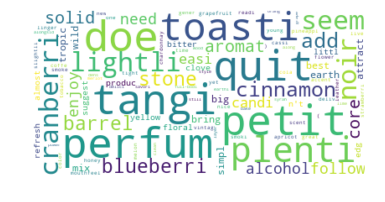

In [64]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(di)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

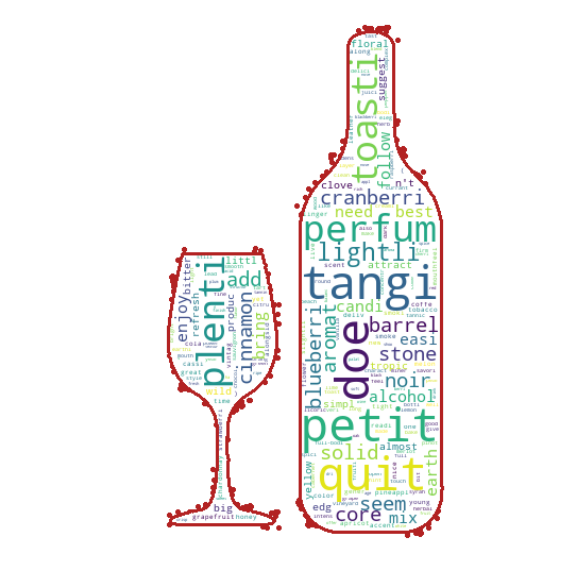

In [72]:
wc = WordCloud(background_color="white", max_words=200, mask=wine_mask,
                contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate_from_frequencies(di)

# store to file
wc.to_file('cloud_wine.jpg')

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
data=data.join(bow)

In [32]:
data=data.drop(['description','title',',_nlp','._nlp','thi_nlp','\'s_nlp'],axis=1)

In [33]:
data

,country,designation,points,price,taster_name,variety,winery,year,ex_title3,wine_nlp,...,seem_nlp,cranberri_nlp,lightli_nlp,plenti_nlp,toasti_nlp,perfum_nlp,quit_nlp,doe_nlp,petit_nlp,tangi_nlp
0,Portugal,Avidagos,87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011.0,Douro,1,...,0,0,0,0,0,0,0,0,0,0
1,US,NaN,87,14.0,Paul Gregutt,Pinot Gris,Rainstorm,2013.0,Willamette Valley,1,...,0,0,0,0,0,0,0,0,0,0
2,US,Reserve Late Harvest,87,13.0,Alexander Peartree,Riesling,St. Julian,2013.0,Lake Michigan Shore,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Vintner's Reserve Wild Child Block,87,65.0,Paul Gregutt,Pinot Noir,Sweet Cheeks,2012.0,Willamette Valley,1,...,0,0,0,0,0,0,0,0,0,0
4,Spain,Ars In Vitro,87,15.0,Michael Schachner,Tempranillo-Merlot,Tandem,2011.0,Navarra,0,...,0,0,0,0,0,0,0,0,0,0
5,Italy,Belsito,87,16.0,Kerin O’Keefe,Frappato,Terre di Giurfo,2013.0,Vittoria,0,...,0,0,0,0,0,0,0,0,0,0
6,France,NaN,87,24.0,Roger Voss,Gewürztraminer,Trimbach,2012.0,Alsace,1,...,0,0,0,0,0,0,0,0,0,0
7,Germany,Shine,87,12.0,Anna Lee C. Iijima,Gewürztraminer,Heinz Eifel,2013.0,Rheinhessen,1,...,0,0,0,0,0,0,0,0,0,0
8,France,Les Natures,87,27.0,Roger Voss,Pinot Gris,Jean-Baptiste Adam,2012.0,Alsace,0,...,0,0,0,0,0,0,0,0,0,0
9,US,Mountain Cuvée,87,19.0,Virginie Boone,Cabernet Sauvignon,Kirkland Signature,2011.0,Napa Valley,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data_copy=data.copy()

In [35]:
data_copy

,country,designation,points,price,taster_name,variety,winery,year,ex_title3,wine_nlp,...,seem_nlp,cranberri_nlp,lightli_nlp,plenti_nlp,toasti_nlp,perfum_nlp,quit_nlp,doe_nlp,petit_nlp,tangi_nlp
0,Portugal,Avidagos,87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011.0,Douro,1,...,0,0,0,0,0,0,0,0,0,0
1,US,NaN,87,14.0,Paul Gregutt,Pinot Gris,Rainstorm,2013.0,Willamette Valley,1,...,0,0,0,0,0,0,0,0,0,0
2,US,Reserve Late Harvest,87,13.0,Alexander Peartree,Riesling,St. Julian,2013.0,Lake Michigan Shore,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Vintner's Reserve Wild Child Block,87,65.0,Paul Gregutt,Pinot Noir,Sweet Cheeks,2012.0,Willamette Valley,1,...,0,0,0,0,0,0,0,0,0,0
4,Spain,Ars In Vitro,87,15.0,Michael Schachner,Tempranillo-Merlot,Tandem,2011.0,Navarra,0,...,0,0,0,0,0,0,0,0,0,0
5,Italy,Belsito,87,16.0,Kerin O’Keefe,Frappato,Terre di Giurfo,2013.0,Vittoria,0,...,0,0,0,0,0,0,0,0,0,0
6,France,NaN,87,24.0,Roger Voss,Gewürztraminer,Trimbach,2012.0,Alsace,1,...,0,0,0,0,0,0,0,0,0,0
7,Germany,Shine,87,12.0,Anna Lee C. Iijima,Gewürztraminer,Heinz Eifel,2013.0,Rheinhessen,1,...,0,0,0,0,0,0,0,0,0,0
8,France,Les Natures,87,27.0,Roger Voss,Pinot Gris,Jean-Baptiste Adam,2012.0,Alsace,0,...,0,0,0,0,0,0,0,0,0,0
9,US,Mountain Cuvée,87,19.0,Virginie Boone,Cabernet Sauvignon,Kirkland Signature,2011.0,Napa Valley,1,...,0,0,0,0,0,0,0,0,0,0


In [110]:
col='variety'
cut = 0.9

In [111]:
n = data_copy[col].nunique()
cut = 0.9
m = data_copy.shape[0] * cut
counts = data_copy[col].value_counts()
su = 0
for i in range(n):
    su += counts[i]
    if su>m:
        ot = counts.index[i+1:]
        break
fil=[x in ot for x in data_copy[col]]
data_copy[col][fil]='other'        

dummy = pd.get_dummies(data_copy[col],dummy_na=True,prefix=col)

data_copy=data_copy.join(dummy)

data_copy=data_copy.drop(col,axis=1)

C:\Users\wenqi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [112]:
data_copy

,country,designation,points,price,taster_name,winery,year,ex_title3,wine_nlp,flavor_nlp,...,variety_Tempranillo,variety_Tempranillo Blend,variety_Torrontés,variety_Verdejo,variety_Vermentino,variety_Viognier,variety_White Blend,variety_Zinfandel,variety_other,variety_nan
0,Portugal,Avidagos,87,15.0,Roger Voss,Quinta dos Avidagos,2011.0,Douro,1,0,...,0,0,0,0,0,0,0,0,0,0
1,US,NaN,87,14.0,Paul Gregutt,Rainstorm,2013.0,Willamette Valley,1,2,...,0,0,0,0,0,0,0,0,0,0
2,US,Reserve Late Harvest,87,13.0,Alexander Peartree,St. Julian,2013.0,Lake Michigan Shore,0,0,...,0,0,0,0,0,0,0,0,0,0
3,US,Vintner's Reserve Wild Child Block,87,65.0,Paul Gregutt,Sweet Cheeks,2012.0,Willamette Valley,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Spain,Ars In Vitro,87,15.0,Michael Schachner,Tandem,2011.0,Navarra,0,1,...,0,0,0,0,0,0,0,0,1,0
5,Italy,Belsito,87,16.0,Kerin O’Keefe,Terre di Giurfo,2013.0,Vittoria,0,0,...,0,0,0,0,0,0,0,0,1,0
6,France,NaN,87,24.0,Roger Voss,Trimbach,2012.0,Alsace,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Germany,Shine,87,12.0,Anna Lee C. Iijima,Heinz Eifel,2013.0,Rheinhessen,1,1,...,0,0,0,0,0,0,0,0,0,0
8,France,Les Natures,87,27.0,Roger Voss,Jean-Baptiste Adam,2012.0,Alsace,0,1,...,0,0,0,0,0,0,0,0,0,0
9,US,Mountain Cuvée,87,19.0,Virginie Boone,Kirkland Signature,2011.0,Napa Valley,1,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
def to_dummy(data_copy,col,cut):
    n = data_copy[col].nunique()
    m = data_copy.shape[0] * cut
    counts = data_copy[col].value_counts()
    su = 0
    ot=[]
    for i in range(n):
        su += counts[i]
        if su>m:
            ot = counts.index[i+1:]
            break
    fil=[x in ot for x in data_copy[col]]
    data_copy[col][fil]='other'        

    dummy = pd.get_dummies(data_copy[col],dummy_na=True,prefix=col)
    data_copy=data_copy.join(dummy)
    data_copy=data_copy.drop(col,axis=1)  
    gc.collect()
    return data_copy

In [126]:
data

,designation,points,price,taster_name,variety,winery,year,ex_title3,wine_nlp,flavor_nlp,...,country_Argentina,country_Austria,country_Chile,country_France,country_Italy,country_Portugal,country_Spain,country_US,country_other,country_nan
0,Avidagos,87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011.0,Douro,1,0,...,0,0,0,0,0,1,0,0,0,0
1,NaN,87,14.0,Paul Gregutt,Pinot Gris,Rainstorm,2013.0,Willamette Valley,1,2,...,0,0,0,0,0,0,0,1,0,0
2,Reserve Late Harvest,87,13.0,Alexander Peartree,Riesling,St. Julian,2013.0,Lake Michigan Shore,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Vintner's Reserve Wild Child Block,87,65.0,Paul Gregutt,Pinot Noir,Sweet Cheeks,2012.0,Willamette Valley,1,0,...,0,0,0,0,0,0,0,1,0,0
4,Ars In Vitro,87,15.0,Michael Schachner,Tempranillo-Merlot,Tandem,2011.0,Navarra,0,1,...,0,0,0,0,0,0,1,0,0,0
5,Belsito,87,16.0,Kerin O’Keefe,Frappato,Terre di Giurfo,2013.0,Vittoria,0,0,...,0,0,0,0,1,0,0,0,0,0
6,NaN,87,24.0,Roger Voss,Gewürztraminer,Trimbach,2012.0,Alsace,1,0,...,0,0,0,1,0,0,0,0,0,0
7,Shine,87,12.0,Anna Lee C. Iijima,Gewürztraminer,Heinz Eifel,2013.0,Rheinhessen,1,1,...,0,0,0,0,0,0,0,0,1,0
8,Les Natures,87,27.0,Roger Voss,Pinot Gris,Jean-Baptiste Adam,2012.0,Alsace,0,1,...,0,0,0,1,0,0,0,0,0,0
9,Mountain Cuvée,87,19.0,Virginie Boone,Cabernet Sauvignon,Kirkland Signature,2011.0,Napa Valley,1,1,...,0,0,0,0,0,0,0,1,0,0


In [37]:
data=to_dummy(data,'country',0.9)

C:\Users\wenqi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [38]:
data=to_dummy(data,'taster_name',1)

C:\Users\wenqi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [39]:
data=to_dummy(data,'variety',0.9)

C:\Users\wenqi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [41]:
data=to_dummy(data,'winery',0.8)

C:\Users\wenqi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [45]:
data=to_dummy(data,'ex_title3',0.9)

C:\Users\wenqi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [48]:
data=to_dummy(data,'designation',0.4)

C:\Users\wenqi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [49]:
data

,points,price,year,wine_nlp,flavor_nlp,fruit_nlp,finish_nlp,aroma_nlp,palat_nlp,acid_nlp,...,ex_title3_Wachau,ex_title3_Wahluke Slope,ex_title3_Washington,ex_title3_Western Cape,ex_title3_Willamette Valley,ex_title3_Yakima Valley,ex_title3_other,ex_title3_nan,designation_other,designation_nan
0,87,15.0,2011.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,87,14.0,2013.0,1,2,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,87,13.0,2013.0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
3,87,65.0,2012.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,87,15.0,2011.0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
5,87,16.0,2013.0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,1,0
6,87,24.0,2012.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,87,12.0,2013.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,87,27.0,2012.0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9,87,19.0,2011.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120975 entries, 0 to 120974
Columns: 3009 entries, points to designation_nan
dtypes: float64(2), int64(197), uint8(2810)
memory usage: 507.9 MB


In [51]:
data.to_csv('clean_data.csv')

In [52]:
import pickle
with open('clean_data_pickle','wb') as f:
    pickle.dump(data,f)